# Interpolation & Curve fitting

Given discrete datasets of the form
$$
p(x,y) = { (x_i, y_i) }  0 \le i \lt n
$$

Interpolation
> เส้นโค้งที่ลากผ่านทุกจุดของ $p$

Curve fitting
> เส้นตรงหรือเส้นโค้งที่ประมาณการความสัมพันธ์ของ $p$


# ข้อมูลส่วนสูงและน้ำหนัก

| ชื่อ | น้ำหนัก  | ส่วนสูง   |
|----|--------|--------|
| A  |  60    |  178   |
| B  |  50    |  170   |
| C  |  55    |  176   |
| D  |  65    |  178   |
| E  |  62    |  180   |

หมายเหตุ: ขอปกปิดชื่อเพื่อปกป้องสิทธิ์ของผู้บริสุทธ์

In [1]:
import sympy
sympy.init_printing(use_latex='mathjax')

In [2]:
x, y = sympy.symbols('x y')

In [3]:
y = (x-2)*(x+3)*(x-6)
y

(x - 6)⋅(x - 2)⋅(x + 3)

In [7]:
z = sympy.expand(y)
z

 3      2            
x  - 5⋅x  - 12⋅x + 36

In [9]:
v = z.diff(x)

In [10]:
v.integrate(x)

 3      2       
x  - 5⋅x  - 12⋅x

In [11]:
from sympy.abc import a,b,c,d,e

In [13]:
v = 2*e**(x**2 + 3*x)
v

    2      
   x  + 3⋅x
2⋅e        

In [15]:
from sympy import cos
u = e**(cos(2*x))
u

 cos(2⋅x)
e        

In [16]:
u.diff(x)

    cos(2⋅x)                
-2⋅e        ⋅log(e)⋅sin(2⋅x)

# ความรู้เกี่ยวกับ sympy
Note เอง
```python
import sympy
sympy.init_printing(use_latex='mathjax')
x, y = sympy.symbols('x y')
```

<IPython.core.display.Javascript object>


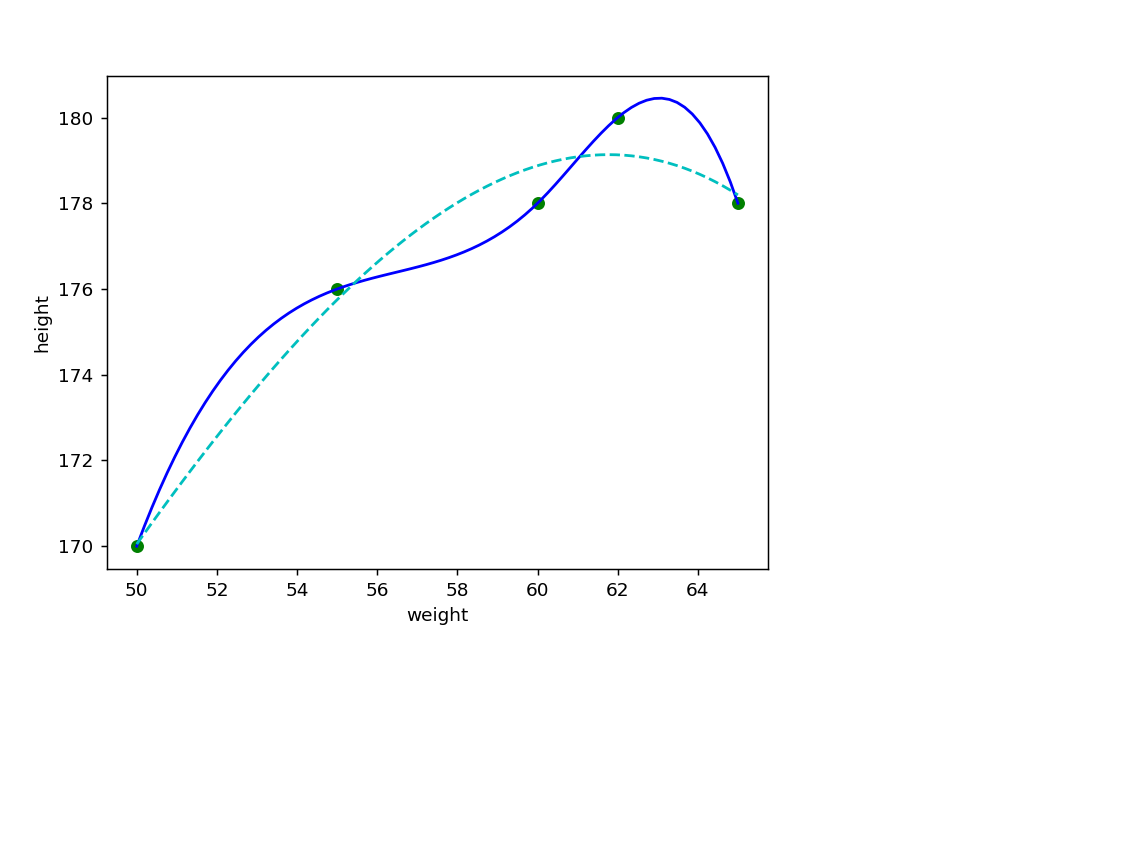

In [18]:
%matplotlib notebook
import numpy as np
import sympy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
px = [60, 50, 55, 65, 62]
py = [178, 170, 176, 178, 180]
xint = np.linspace(50,65,80)
interp = interp1d(px, py, kind='cubic')
regress = np.poly1d(np.polyfit(px, py, 3))
plt.xlabel('weight')
plt.ylabel('height')
plt.plot(px,py,'go', xint, interp(xint), 'b', xint, regress(xint), 'c--')
#plt.label([, 'interpolation', 'curve fitting'])

In [21]:
regress(60), interp(60)
regress(71)

170.608956289

In [22]:
interp(71)

ValueError: A value in x_new is above the interpolation range.

# Interpolation - Lagrange's Method
$$
P_n(x) = \sum_{i=0}^{n}{y_i l_i (x)} \\
    l_i(x) = \frac{x-x_0}{x_i-x_0}\cdot\frac{x-x_1}{x_i-x_1}\cdots\frac{x-x_{i-1}}{x_i-x_{i-1}}\cdot\frac{x-x_{i+1}}{x_i-x_{i+1}}\cdots\frac{x-x_n}{x_i-x_n} 
$$


$x_i = \{x_0=60, x_1=50, x_2=55, x_3=65, x_4=62\}$

$y_i = \{y_0=178, y_1=170, y_2=176, y_3=178, y_4=180\}$

$
l_0(x) = \frac{x-x_1}{x_0-x_1}\cdot\frac{x-x_2}{x_0-x_2}\cdot\frac{x-x_3}{x_0-x_3}\cdot\frac{x-x_4}{x_0-x_4} \\
l_1(x) = \frac{x-x_0}{x_1-x_0}\cdot\frac{x-x_2}{x_1-x_2}\cdot\frac{x-x_3}{x_1-x_3}\cdot\frac{x-x_4}{x_1-x_4} \\
l_2(x) = \frac{x-x_0}{x_2-x_0}\cdot\frac{x-x_1}{x_2-x_1}\cdot\frac{x-x_3}{x_2-x_3}\cdot\frac{x-x_4}{x_2-x_4} \\
l_3(x) = \frac{x-x_0}{x_3-x_0}\cdot\frac{x-x_1}{x_3-x_1}\cdot\frac{x-x_2}{x_3-x_2}\cdot\frac{x-x_4}{x_3-x_4} \\
l_4(x) = \frac{x-x_0}{x_4-x_0}\cdot\frac{x-x_1}{x_4-x_1}\cdot\frac{x-x_2}{x_4-x_2}\cdot\frac{x-x_3}{x_4-x_3} \\
$

$
l_0(x) = \frac{x-50}{60-50}\cdot\frac{x-55}{60-55}\cdot\frac{x-65}{60-65}\cdot\frac{x-62}{60-62} \\
l_1(x) = \frac{x-60}{50-60}\cdot\frac{x-55}{50-55}\cdot\frac{x-65}{50-65}\cdot\frac{x-62}{50-62} \\
l_2(x) = \frac{x-60}{55-60}\cdot\frac{x-50}{55-50}\cdot\frac{x-65}{55-65}\cdot\frac{x-62}{55-62} \\
l_3(x) = \frac{x-60}{65-60}\cdot\frac{x-50}{65-50}\cdot\frac{x-55}{65-55}\cdot\frac{x-62}{65-62} \\
l_4(x) = \frac{x-60}{62-60}\cdot\frac{x-50}{62-50}\cdot\frac{x-55}{62-55}\cdot\frac{x-65}{62-65} \\
$

In [0]:
x, y = sympy.symbols('x y')

In [0]:
l0 = (x-50)*(x-55)*(x-65)*(x-62)/((60-50)*(60-55)*(60-65)*(60-62))
l1 = ?
l2 = ?
l3 = ?
l4 = ?

(x - 65)⋅(x - 62)⋅(x - 55)⋅(x - 50)
───────────────────────────────────
                500                

In [0]:
sympy.expand(l0)


  4       3         2                 
 x    58⋅x    4023⋅x    7724⋅x        
─── - ───── + ─────── - ────── + 22165
500    125      100       5           

In [0]:
l0.evalf()

0.002⋅(x - 65.0)⋅(x - 62.0)⋅(x - 55.0)⋅(x - 50.0)

In [0]:
l0.evalf(subs={x:60.0})

1.00000000000000

In [0]:
f = sympy.lambdify(x, l0, "numpy")
f(60) + f(55)
p4x = 178*l0 + 170*l1 + 176*l2 + 178*l3 + 180*l4

f = sympy.lamdify(x, px4, "numpy")
#f(58)
#x = np.linspace(50, 80, 100)
x = np.arange(50, 80, 0.2)
y = [f(i) for i in x]
plt.plot(x, y)

1.0

# Exercise 
* จงคำนวณหา $l_1, l_2, l_3, l_4$ 
* จงคำนวณหา $P_4(x)$

# Interpolation - Newton's method
$$
P_n(x) = a_0 + (x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\cdot\cdots\cdot(x-x_{n-1})a_n
$$

or

$
P_0(x) = a_n \\
P_k(x) = a_{n-k} + (x-x_{n-k})P_{k-1}(x)  \to k=1,2,..,n
$

$
y_i = P_n(x_i)
$

$
y_0 = P_n(x_0) = a_0 \\
y_1 = P_n(x_1) = a_0 + (x_1-x_0)a_1 \\
y_2 = P_n(x_2) = a_0 + (x_2-x_0)a_1 + (x_2-x_0)(x_2-x_1)a_2 \\
\cdots \\
y_n = P_n(x_n) = a_0 + (x_n-x_0)a_1 + \cdots + (x_n-x_0)(x_n-x_1)\cdots(x_n-x_{n-1})a_n
$

$
\delta_i^1 = \frac{y_i-y_0}{x_i-x_0}, i = 1, 2, \cdots, n \\
\delta_i^2 = \frac{\delta_i^1-\delta_1^1}{x_i-x_1}, i = 2, 3, \cdots, n \\
\delta_i^3 = \frac{\delta_i^2-\delta_2^2}{x_i-x_2}, i = 3, 4, \cdots, n \\
\delta_i^4 = \frac{\delta_i^3-\delta_3^3}{x_i-x_3}, i = 4, \cdots, n 
\\
\vdots \\
\delta_n^n = \frac{\delta_n^{n-1}-\delta_{n-1}^{n-1}}{x_n-x_{n-1}} 
$

$$
a_0 = y_0 \\
a_1 = \delta_1^1 \\
a_2 = \delta_2^2 \\
\vdots \\
a_n = \delta_n^n 
$$

# Interpolation - Newton's Method Code
```python
def Pn(a,x,xi):
    n = len(x) - 1
    # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (xi - x[n-k])*p
    return p
    
def coeffts(x, y):
    m = len(x)
    # Number of data points
    a = y.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])
    return a
```

# Interpolation - Newton's Method Manual

 | $x_0$  |  $y_0$  |       -      |      -       |      -       |      -       |
 |--------|---------|--------------|--------------|--------------|--------------|
 | $x_1$  |  $y_1$  | $\delta_1^1$ |      -       |      -       |      -       |
 | $x_2$  |  $y_2$  | $\delta_2^1$ |$\delta_2^2$  |      -       |      -       |
 | $x_3$  |  $y_3$  | $\delta_3^1$ |$\delta_3^2$  |$\delta_3^3$  |      -       |
 | $x_4$  |  $y_4$  | $\delta_4^1$ |$\delta_4^2$  |$\delta_4^3$  |$\delta_4^4$  |


### Step 1

| $60$  |  $178$  |      -       |       -      |      -       |      -       |
|-------|---------|--------------|--------------|--------------|--------------|
| $50$  |  $170$  | $\frac{170-178}{50-60}$ |      -       |      -       |      -       |
| $55$  |  $176$  | $\frac{176-178}{55-60}$ |$\delta_2^2$  |      -       |      -       |
| $65$  |  $178$  | $\frac{178-178}{65-60}$ |$\delta_3^2$  |$\delta_3^3$  |      -       |
| $62$  |  $180$  | $\frac{180-178}{62-60}$ |$\delta_4^2$  |$\delta_4^3$  |$\delta_4^4$  |

### Step 2

| $60$  |  $178$  |      -       |      -       |      -       |      -       |
|-------|---------|--------------|--------------|--------------|--------------|
| $50$  |  $170$  | $0.8$ |       -      |      -       |      -       |
| $55$  |  $176$  | $0.4$ |$\frac{0.4-0.8}{55-50}$  |      -       |      -       |
| $65$  |  $178$  | $0.0$ |$\frac{0.0-0.8}{65-50}$  |$\delta_3^3$  |      -       |
| $62$  |  $180$  | $1.0$ |$\frac{1.0-0.8}{62-50}$  |$\delta_4^3$  |$\delta_4^4$  |

### Step 3

| $60$  |  $178$  |      -       |       -      |      -       |      -       |
|-------|---------|--------------|--------------|--------------|--------------|
| $50$  |  $170$  | $0.8$ |      -       |       -      |       -      |
| $55$  |  $176$  | $0.4$ |$0.08$  |      -       |      -       |
| $65$  |  $178$  | $0.0$ |$-0.0533$  |$\delta_3^3$  |      -       |
| $62$  |  $180$  | $1.0$ |$0.01666$  |$\delta_4^3$  |$\delta_4^4$  |

### Step 4

| $60$  |  $178$  |      -       |       -        |        -         |      -       |
|-------|---------|--------------|----------------|------------------|--------------|
| $50$  |  $170$  | $0.8$ |      -        |       -        |      -       |
| $55$  |  $176$  | $0.4$ |$-0.08$  |       -        |       -      |
| $65$  |  $178$  | $0.0$ |$-0.0533$  |$\frac{(-0.0533+0.08)}{65-55}$  |      -       |
| $62$  |  $180$  | $1.0$ |$0.01666$  |$\frac{0.01666+0.08}{62-55}$  |$\delta_4^4$  |

### Step 5

| $60$  |  $178$  |      -       |       -        |        -         |      -       |
|-------|---------|--------------|----------------|------------------|--------------|
| $50$  |  $170$  | $0.8$ |       -       |       -        |      -       |
| $55$  |  $176$  | $0.4$ |$0.08$  |        -       |       -      |
| $65$  |  $178$  | $0.0$ |$-0.0533$  |$0.00267$  |       -      |
| $62$  |  $180$  | $1.0$ |$0.01666$  |$0.0138$  |$\delta_4^4$  |

### Step 6

| $60$  |  $178$  |      -       |        -       |        -         |      -       |
|-------|---------|--------------|----------------|------------------|--------------|
| $50$  |  $170$  | $0.8$ |        -      |       -        |      -       |
| $55$  |  $176$  | $0.4$ |$0.08$  |       -        |      -       |
| $65$  |  $178$  | $0.0$ |$-0.0533$  |$0.00267$  |      -       |
| $62$  |  $180$  | $1.0$ |$0.01666$  |$0.0138$  |$\frac{(0.0138-0.00267)}{(62-65)}$  |

### Step 7

| $60$  |  $178$  |        -     |        -       |         -        |      -       |
|-------|---------|--------------|----------------|------------------|--------------|
| $50$  |  $170$  | $0.8$ |       -       |         -      |       -      |
| $55$  |  $176$  | $0.4$ |$0.08$  |       -        |      -       |
| $65$  |  $178$  | $0.0$ |$-0.0533$  |$0.00267$  |       -      |
| $62$  |  $180$  | $1.0$ |$0.01666$  |$0.0138$  |$-0.00371$  |

$a_i = \{178, 0.8, 0.08, -0.01333, 0.0001426\}$

# Exercise
* verify $a_i$
* จงหา $a_i$ เมื่อกำหนดชุดข้อมูล 

$ x = \{-2, 1, 4, -1, 3, -4\} $ 

$ y = \{-1, 2, 59, 4, 24, -53\} $

# Regression

## Least-Square Fit

1. ทบทวน
สมการเส้นตรง $ y = f(x) = a + bx $ เมื่อ

$a$ คือ y-intercept

$b$ คือ ความชันของเส้นตรง

เมื่อโจทย์กำหนด ว่าเส้นตรงลากผ่าน $(x_1, y_1)$ และ $(x_2, y_2)$ สมการในการหาค่า $a$ และ $b$ คือ

$$
y = a + bx \\
y_1 = a + bx_1 \to (1)  \\
y_2 = a + bx_2 \to (2)  \\
(2) - (1) \to  y_2 - y_1 = a + bx_2 - (a + bx_1) \\
y_2 - y_1 = bx_2 - bx_1 \\
y_2 - y_1 = b(x_2 - x_1) \\
\\
b = \frac{y_2 - y_1}{x_2 - x_1} \\ 
a = y_1 - bx_1 \\
$$


In [0]:
def ab(x1,y1,x2,y2):
    b = (y2-y1)/(x2-x1)
    a = y1 - b*x1
    return a,b

ab(40,165,50,172)

(137.0, 0.7)

* โจทย์ จงหาสมการเส้นตรงที่ลากผ่านจุด (40,165) และ (50,172)

เนื่องจาก สมการเส้นตรงคือ $y = a + bx \to (i) $ 

ดังนั้นถ้าสมการนี้วิ่งผ่านเด๋วเราจะแทนด้วย $(40,165)$ นั่นคือ $(x=40, y=165)$ 

แทนไปในสมการที่ $(i)$ จะได้ว่า  

$165 = a + b 40 \to (1) $

$172 = a + b 50 \to (2) $

$(2) - (1) \to 172-165 = a + 50b - (a + 40b)$

$7 = 10b \to b = \frac{7}{10}$

แทน $b$ ในสมการที่ $(1)$ จะได้

$165 = a + \frac{7}{10}40$

$165 = a + 28$

$a = 165-28$

กำหนดจำนวน n+1 ชุด และ $f(x) = f(x;a_0, a_1, ..., a_m)$ เป็นฟังก์ชันจำลองความสัมพันธ์ของข้อมูล
โดยที่ $m < n$ แล้ว least-square fit คือการหาค่าที่น้อยที่สุดของฟังก์ชัน

$$
S(a_0, a_1, ..., a_m) = \sum_{i=0}^{n}(y_i - f(x_i))^2  \\
\frac{\delta S}{\delta a_k} = 0, \forall k=0,1,..,m
$$

$r_i = y_i - f(x_i) \to $ residual

## fitting a line - ความสัมพันธ์เป็นเส้นตรง
เรียกอีกอย่างว่า linear regression นั่นคือการใช้เส้นตรงเพื่อแทนความสัมพันธ์ของข้อมูล ตามวิธีการดังนี้

กำหนดชุดข้อมูล $ (x_i, y_i) $ สำหรับ  $0 \le i \le n$

$$
f(x) = a + bx \\
S(a,b) = \sum_{i=0}^{n}(y_i-f(x_i))^2 = \sum_{i=0}^{n}(y_i-a-bx_i)^2 \\
$$

ดังนั้น

$$
\frac{\delta S}{\delta a} = 0 \\
\sum_{i=0}^{n}{-2(y_i-a-bx_i)} = 0 \\
2(a(n+1)+b\sum_{i=0}^{n}{x_i} - \sum_{i=0}^{n}{y_i}) = 0 \to (1) \\
\frac{(1)}{2(n+1)} \to a +b\frac{\sum_{i=0}^{n}{x_i}}{n+1} - \frac{\sum_{i=0}^{n}{y_i}}{n+1} = 0 \to (2)
$$
เนื่องจาก $\bar{x} = \frac{\sum_{i=0}^{n}{x_i}}{n+1}$ และ $\bar{y} = \frac{\sum_{i=0}^{n}{y_i}}{n+1}$ คือค่าเฉลี่ยของ $x$ และค่าเฉลี่ยของ $y$ ตามลำดับ 

ดังนั้น สมการที่ $(2)$ จึงเขียนใหม่ได้เป็น 
$$
a + \bar{x}b = \bar{y} \to (3)
$$

และ
$$
\frac{\delta S}{\delta b} = 0 \\
\sum_{i=0}^{n}(-2(y_i-a-bx_i)x_i) = 0 \\
2(a\sum_{i=0}^n{x_i} + b\sum_{i=0}^n{x_i^2}-\sum_{i=0}^n{x_iy_i}) = 0 \\
a\sum_{i=0}^n{x_i} + b\sum_{i=0}^n{x_i^2} = \sum_{i=0}^n{x_iy_i} \to (4)
$$ 


## คะแนนพิเศษ - หาสูตรคำนวณค่า $b$
$$
b = \frac{\sum{x_iy_i} - \sum{x_i}\bar{y}}{\sum{x_i^2}-\sum{x_i\bar{x}}} \\
a = \bar{y} - \bar{x}b 
$$

<IPython.core.display.Javascript object>


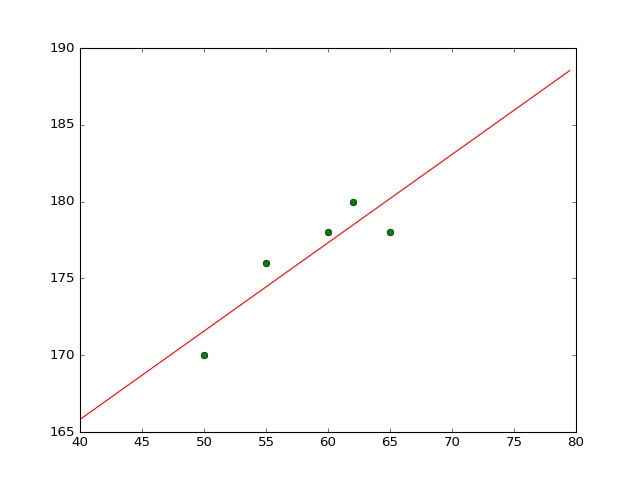

In [0]:
def linreg(x, y):
    sumx = sum(x)
    ybar = sum(y)/len(y)
    xbar = sumx/len(x)
    xi2 = [ xi*xi for xi in x ]
    xiyi = [ z[0]*z[1] for z in zip(x,y) ]
    b = (sum(xiyi) - sumx*ybar)/(sum(xi2)-sumx*xbar)
    a = ybar - xbar*b
    return a,b

%matplotlib notebook
a, b = linreg([60,50,55,65,62], [178,170,176,178,180])
def f(x): return a + b*x
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(40,80,0.5)
y = np.array([ f(xi) for xi in x ], float)
plt.plot(x, y, 'r-', [60,50,55,65,62], [178,170,176,178,180], 'go')

# exercise
* จงหาค่า $a$ และ $b$ ของ linear regression ที่แทนความสัมพันธ์ของข้อมูลชุดนี้
[ (-1.0, 1.0), (-0.5, -0.55), (0.0, 0.0), (0.5, 0.45), (1.0, 1.0) ]

* จงเขียนโปรแกรมเพื่อหาค่า $a$ และ $b$ ของ linear regression ที่แทนความสัมพันธ์ของข้อมูลชุดนี้

| ชื่อ | น้ำหนัก  | ส่วนสูง   |
|----|--------|---------|
| A  |  60    |  178   |
| B  |  50    |  170   |
| C  |  55    |  176   |
| D  |  65    |  178   |
| E  |  62    |  180   |

In [0]:
def Pn(a,x,xi):
    n = len(x) - 1
    # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (xi - x[n-k])*p
    return p  
def coeff(x, y):
    m = len(x)
    # Number of data points
    a = y.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])
    return a

In [0]:
import numpy as np
x = np.array([60, 50, 55, 65, 62], float)
y = np.array([178, 170, 176, 178, 180], float)
a = coeff(x, y)
a

array([  1.78000000e+02,   8.00000000e-01,  -8.00000000e-02,
         2.66666667e-03,  -3.71428571e-03])